## Assignment: $k$ Means Clustering

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

In [2]:
! git clone https://github.com/ds3001f25/clustering_assignment.git

Cloning into 'clustering_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 221.98 KiB | 4.19 MiB/s, done.


In [3]:
cd clustering_assignment/

/content/clustering_assignment


In [4]:
%cd data/

/content/clustering_assignment/data


In [5]:
ls -al

total 516
drwxr-xr-x 2 root root   4096 Sep 29 22:51  ./
drwxr-xr-x 4 root root   4096 Sep 29 22:51  ../
-rw-r--r-- 1 root root  45921 Sep 29 22:51 '2022 election cycle fundraising.csv'
-rw-r--r-- 1 root root 466989 Sep 29 22:51 'SIPRI Military Expenditure Database.csv'


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

1.1

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def createData(noise,N=50):
    np.random.seed(100) # set seed for replicability

    # generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])

    # concatenate into one df
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

1.2 - 0.125

<Axes: xlabel='x1', ylabel='x2'>

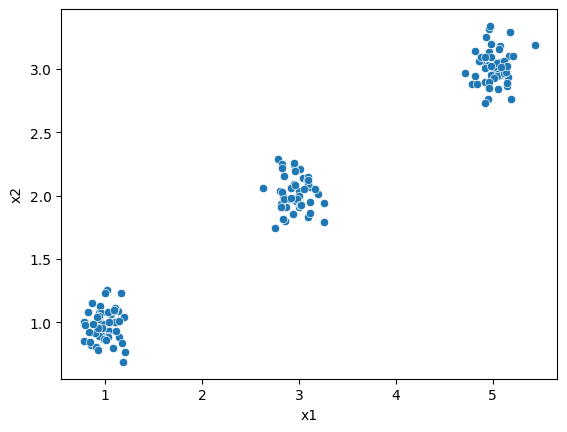

In [7]:
sns.scatterplot(data=df0_125,x='x1',y='x2')

1.2 - 0.25

<Axes: xlabel='x1', ylabel='x2'>

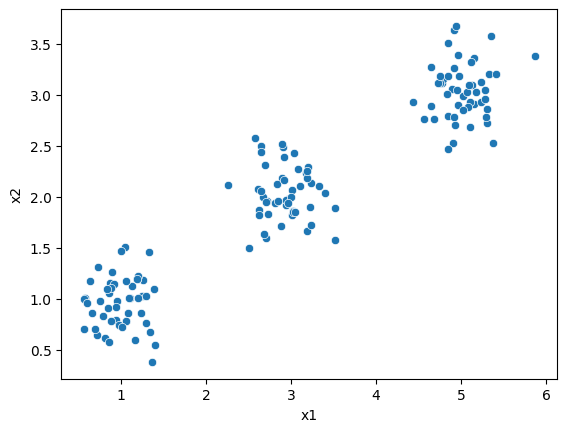

In [8]:
sns.scatterplot(data=df0_25,x='x1',y='x2')

1.2 - 0.5

<Axes: xlabel='x1', ylabel='x2'>

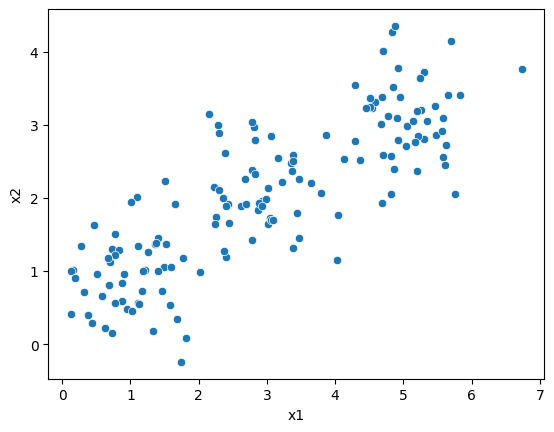

In [9]:
sns.scatterplot(data=df0_5,x='x1',y='x2')

1.2 - 1.0

<Axes: xlabel='x1', ylabel='x2'>

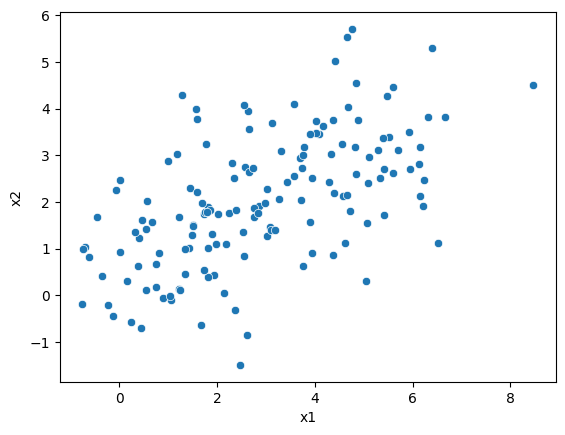

In [10]:
sns.scatterplot(data=df1_0,x='x1',y='x2')

1.2 - 2.0

<Axes: xlabel='x1', ylabel='x2'>

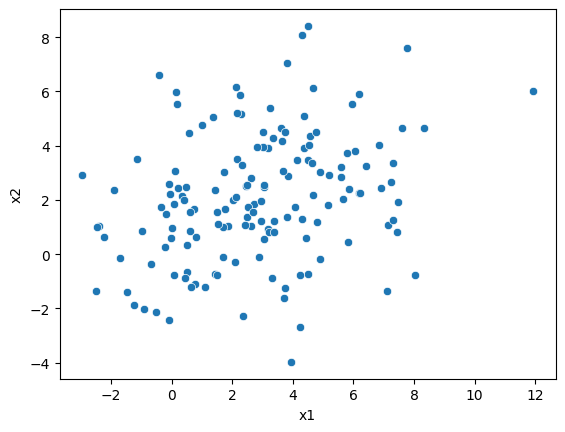

In [11]:
sns.scatterplot(data=df2_0,x='x1',y='x2')

1.2 - As the noise increases, the clusters spread out more and more and it becomes harder to distinguish between the different clusters. The linear relationship that is suggested in the 0.5 plot practically disappears by the last plot.

1.3

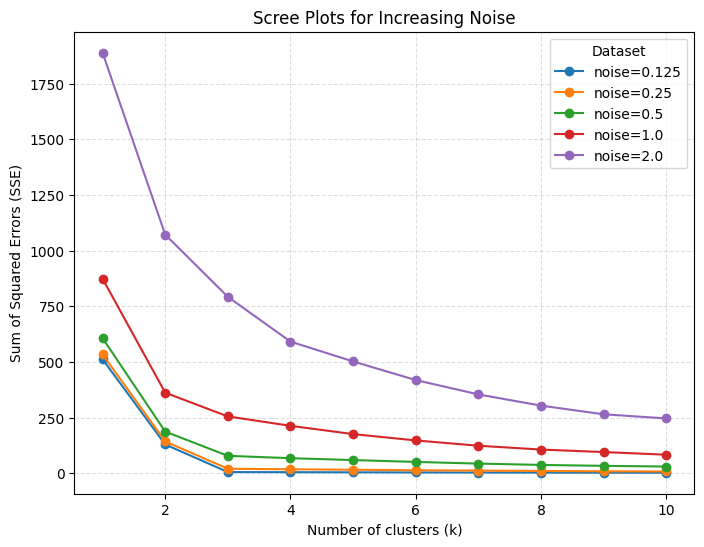

In [12]:
def scree_vals(df, k_bar=10):
    # take in a dataframe and max number of clusters k_bar (default 10)
    X = df[['x1','x2']].values  # get x1 and x2 columns as numpy array
    SSE = []  # create empty list to store sum of squared errors


    # this loops over number of clusters from 1 to k_bar
    for k in range(1, k_bar+1):
        # create kmeans model with k clusters, 10 tries, max 300 iters, fixed seed
        km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=0)
        km.fit(X)  # fit model to data
        SSE.append(km.inertia_)  # append sum of squared errors (inertia) for this k
    return SSE  # return list of SSE values for each k


# dictionary holding different datasets with different noise levels
datasets = {
    'noise=0.125': df0_125,
    'noise=0.25' : df0_25,
    'noise=0.5'  : df0_5,
    'noise=1.0'  : df1_0,
    'noise=2.0'  : df2_0
}


k_bar = 10  # max number of clusters for scree plot
results = {}  # empty dict to store analysis results

# loop through each dataset and calculate scree values (SSEs)
for name, df in datasets.items():
    results[name] = scree_vals(df, k_bar=k_bar)


plt.figure(figsize=(8,6))
k_values = np.arange(1, k_bar+1)  # array from 1 to k_bar inclusive for x-axis

# plot each dataset's SSE values against number of clusters
for name, SSE in results.items():
    plt.plot(k_values, SSE, marker='o', label=name)  # plot points with markers and label

# add labels and title to plot
plt.title('Scree Plots for Increasing Noise')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.legend(title='Dataset')  # add legend w/ title
plt.grid(True, linestyle='--', alpha=0.4)  # add light dashed grid
plt.show()


1.3- There is a sharp elbow at k=3, where the SSE decreases sharply before leeveling out. This is more detectable at low noise levels, but is harder to distinguish as noise increases and SSE decreases more smoothly.

1.4- The optimal k is the k value that minimizes the sum of squared errors. Adding more clusters always lowers SSE and therefore there is a steep decline at that point, which creates the elbow. When noise increased and points didn't form clean cores, the elbow lessens in severity.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**2.1**

In [13]:
election = pd.read_csv("2022 election cycle fundraising.csv")

# I handle it by standardizing the numerical values, stripping commas and dollar
# signs. After cleaning, all values are plain integers, which are much easier
# to deal with from a data science pipeline perspective.

# raised
election['Raised'] = (election['Raised'].str.replace('$', '', regex=False)
.str.replace(',', '', regex=False).str.strip()).astype(int)

# spent
election['Spent'] = (election['Spent'].str.replace('$', '', regex=False)
.str.replace(',', '', regex=False).str.strip()).astype(int)

# cash on hand
election['Cash on Hand'] = (election['Cash on Hand'].str.replace('$', '', regex=False)
.str.replace(',', '', regex=False).str.strip()).astype(int)

# debts
election['Debts'] = (election['Debts'].str.replace('$', '', regex=False)
.str.replace(',', '', regex=False).str.strip()).astype(int)
election.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0


**2.2**

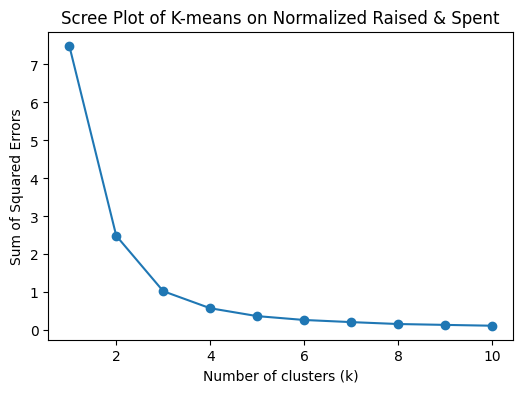

In [14]:
# Scree plot
def maxmin(z):
    w = (z - np.min(z)) / (np.max(z) - np.min(z))
    return w

# Make new normalized columns
election['norm_Raised'] = maxmin(election['Raised'])
election['norm_Spent']  = maxmin(election['Spent'])

# K-means on the normalized columns
X = election[['norm_Raised', 'norm_Spent']].values

k_bar = 10
SSE = []
for k in range(1, k_bar + 1):
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    SSE.append(km.inertia_)

# Scree (elbow) plot
plt.figure(figsize=(6,4))
plt.plot(range(1, k_bar + 1), SSE, marker='o')
plt.title('Scree Plot of K-means on Normalized Raised & Spent')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.show()

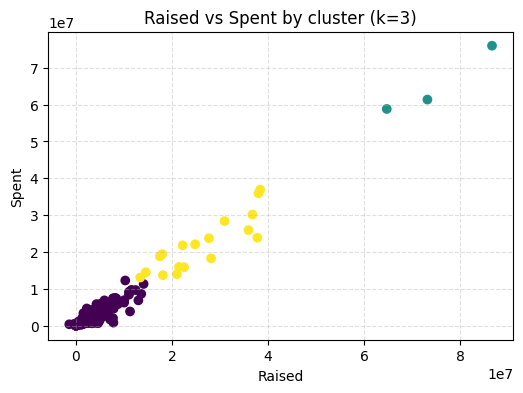

In [22]:
# scatter plot
from sklearn.cluster import KMeans

# pick k from scree plot
k_opt = 3
labels = KMeans(n_clusters=k_opt, n_init=10, random_state=0)\
            .fit_predict(election[['norm_Raised','norm_Spent']])

# attach cluster labels
election['cluster'] = labels

plt.figure(figsize=(6,4))
plt.scatter(election['Raised'], election['Spent'], c=labels)
plt.title('Raised vs Spent by cluster (k=3)')
plt.xlabel('Raised'); plt.ylabel('Spent')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [16]:
# count members of each cluster
counts = election['cluster'].value_counts().sort_values(ascending=True)
print(counts)

# IDs of the two smallest clusters
small_clusters = counts.index[:2]

# show the politicians in those two clusters
cand = (election[election['cluster'].isin(small_clusters)]
       [['Member','Raised','Spent','cluster']]
       .sort_values(['cluster','Raised'], ascending=[True, False]))
print(cand)

cluster
1      3
2     18
0    516
Name: count, dtype: int64
                     Member    Raised     Spent  cluster
417         Raphael Warnock  86581469  75959810        1
340              Mark Kelly  73140886  61357281        1
523             Val Demings  64682883  58806664        1
499                Tim Ryan  38334636  36909832        2
87   Catherine Cortez Masto  37993811  35928936        2
500               Tim Scott  37743256  23876921        2
328             Marco Rubio  36709285  30153111        2
89            Chuck Schumer  35899966  25944350        2
326           Maggie Hassan  30914830  28380992        2
261            John Kennedy  28119082  18276565        2
442             Ron Johnson  27680901  23731653        2
298          Kevin McCarthy  24791538  22086344        2
414               Rand Paul  22490627  15865010        2
390            Nancy Pelosi  22216583  21814643        2
290            Katie Porter  21441693  15946876        2
2               Adam Schiff

Looking at the scree plot, we can see the elbow drops sharply from k=1 to k=3 before flattening out. From this, we can interpret that three clusters best captures the relationship of Raised and Spent.

From the scatter plot, it appears that cluster 0 in the bottom corner is the densest cluster, where candidates did not raise or spend much money. Cluster 2 in the middle is less dense, but shows candidates in the mid-range of fiscal behavior. The three candidates in cluster 1, who raised and spent a lot of money, are Warnock, Kelly, and Demings.

**2.3**

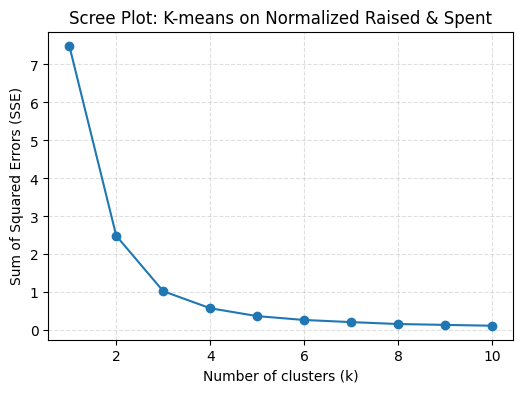

In [17]:
# scree plot
# make new normalized columns
election['norm_Cash_on_Hand'] = maxmin(election['Cash on Hand'])
election['norm_Debts']  = maxmin(election['Debts'])

# k-means on the normalized columns
X_cd = election[['norm_Cash_on_Hand', 'norm_Debts']].values

# building set of SSEs
k_bar = 10
SSE = []
for k in range(1, k_bar + 1):
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    SSE.append(km.inertia_)

# scree (elbow) plot
plt.figure(figsize=(6,4))
plt.plot(range(1, k_bar + 1), SSE, marker='o')
plt.title('Scree Plot: K-means on Normalized Raised & Spent')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

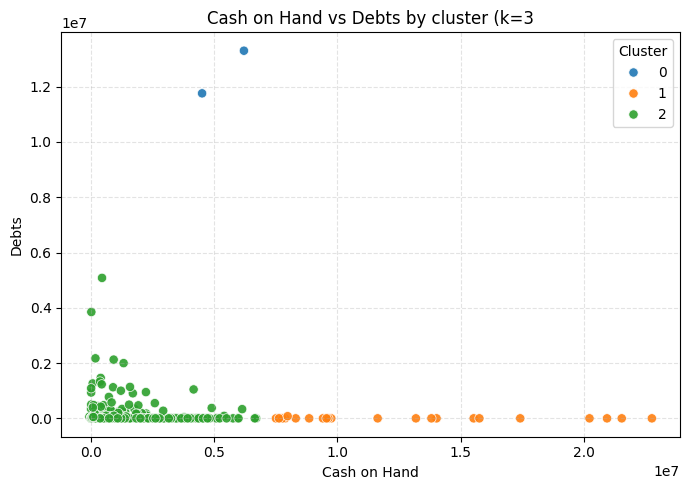

In [18]:
# Scatter plot
# pick k from scree plot
k_opt = 3
labels = KMeans(n_clusters=k_opt, n_init=10, random_state=0).fit_predict(X_cd)
election['cluster_cd'] = labels

# plot
plt.figure(figsize=(7,5))
sns.scatterplot(data=election, x='Cash on Hand', y='Debts',
                hue='cluster_cd', palette='tab10', s=45, alpha=0.9)
plt.title(f'Cash on Hand vs Debts by cluster (k=3')
plt.xlabel('Cash on Hand'); plt.ylabel('Debts')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()

In [19]:
counts = election['cluster_cd'].value_counts().sort_values(ascending=True)
print("Cluster sizes (smallest first):\n", counts, "\n")

smallest_two = counts.index[:2]
out_cd = (election[election['cluster_cd'].isin(smallest_two)]
          [['Member','Cash on Hand','Debts','cluster_cd']]
          .sort_values(['cluster_cd','Cash on Hand'], ascending=[True, False]))
print(out_cd)

Cluster sizes (smallest first):
 cluster_cd
0      2
1     24
2    511
Name: count, dtype: int64 

                  Member  Cash on Hand     Debts  cluster_cd
133          David Trone       6206371  13302000           0
442          Ron Johnson       4508581  11759857           0
417      Raphael Warnock      22762985         0           1
500            Tim Scott      21539824         0           1
2            Adam Schiff      20942888         0           1
89         Chuck Schumer      20231213         0           1
267           John Thune      17419927         0           1
290         Katie Porter      15762568         0           1
261         John Kennedy      15530074         0           1
274      Josh Gottheimer      14024163         0           1
310       Lindsey Graham      13815515         0           1
340           Mark Kelly      13186127         0           1
412  Raja Krishnamoorthi      11633394         0           1
45        Bernie Sanders       9751125         

This elbow is less pronounced than the elbow that we saw in question 2.2. Most candidates demonstrate little cash on hand, but also don't have much debt, as evidenced by thir position on along the x-axis. The difference between this and the previous plots comes from the fact that this data captures the end of the campaign—when candidates have already used a vast proportion of their funding and are hurrying to use more of it before it's too late.

**2.4**

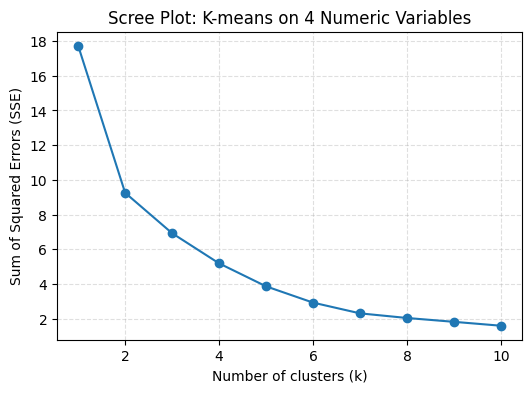

In [20]:
# choose the numeric variables
num_cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']

# keep mins and maxes for potential rescaling
mins = election[num_cols].min()
maxs = election[num_cols].max()

# create the normalized matrix X
X = election[num_cols].apply(maxmin)

k_opt = 3  # pick optimal k
np.random.seed(10)

initial_centroids = np.random.randint(low=1, high=X.shape[0], size=k_opt)
model = KMeans(n_clusters=k_opt, max_iter=300,
               init=X.iloc[initial_centroids,:],
               random_state=0)
model = model.fit(X)

# assign cluster labels back to the dataframe
election['cluster_all4'] = model.predict(X)

# SSE set
k_bar = 10
SSE = []
for k in range(1, k_bar + 1):
    km = KMeans(n_clusters=k, n_init=10, random_state=0)
    km.fit(X)
    SSE.append(km.inertia_)

#plot
plt.figure(figsize=(6,4))
plt.plot(range(1, k_bar + 1), SSE, marker='o')
plt.title('Scree Plot: K-means on 4 Numeric Variables')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

This elbow is not as sharp as in 2.3 but it is clearer than in 2.2. SSE drops steeply from k=1 to k-2, followed by a smaller drop from k=2 to k=3. Then, from there SEE levels off. The reasoning behind it is that there are two strong separators combined with weak ones, making it so that there is a present elbow but the weak pair adds noise, flattening the curve.

**2.5** We were able to derive helpful patterns about candidate fundraising using k-means clustering. In clustering raised vs. spent, outliers clearly stood out and data points were clearly segmened. We also learned when we clustered on Cash on Hand and Debts that most candidates finish with very little of both. Both of these analyses provide insight into how political campaigns operate financially.